In [1]:
from sympy import *
from collections import deque
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

init_printing(use_unicode=True)

In [2]:
vs, io, za, zb, reflection = symbols('vs io za zb Gamma')

io = vs/(za+zb)
reflection = (za - zb)/(za + zb)

AA_v = (-reflection)
AA_i = reflection
AA = Matrix([AA_v,AA_i])

AB_v = (-(1-reflection))
AB_i = (1+reflection)
AB = Matrix([AB_v,AB_i])

BA_v = -(1+reflection)
BA_i = (1-reflection)
BA = Matrix([BA_v,BA_i])

BB_v = (reflection)
BB_i = -(reflection)
BB = Matrix([BB_v,BB_i])

SC = Matrix([-1,1])
OC = Matrix([1,-1])

In [3]:
def reflect_self_A(m):
    return simplify(expand(matrix_multiply_elementwise(m,SC)))

def reflect_self_B(m):
    return simplify(expand(matrix_multiply_elementwise(m,OC)))

def reflect_AA(m):
    return simplify(expand(matrix_multiply_elementwise(m,AA)))

def reflect_AB(m):
    return simplify(expand(matrix_multiply_elementwise(m,AB)))

def reflect_BA(m):
    return simplify(expand(matrix_multiply_elementwise(m,BA)))

def reflect_BB(m):
    return simplify(expand(matrix_multiply_elementwise(m,BB)))

In [4]:
a_i = Matrix([za*io,io])
b_i = Matrix([zb*io,io])

In [5]:
number_lines = 10

fan_out_rows = [[a_i, b_i]]

for i in range(1,number_lines):

    # Generate Self Reflected Wavefronts

    self_reflect_wavefronts = []
    most_recent_row = fan_out_rows[-1]
    is_A = True

    for wavefront in most_recent_row:

        if(is_A):
            temp_wavefront = reflect_self_A(wavefront)
            is_A = False
        else:
            temp_wavefront = reflect_self_B(wavefront)
            is_A = True
        
        self_reflect_wavefronts.append(temp_wavefront)

    fan_out_rows.append(self_reflect_wavefronts)

    # Generate New Wavefronts
    generated_wavefronts = deque()
    merged_wavefronts = []
    most_recent_row = fan_out_rows[-1]
    is_A = True

    for wavefront in most_recent_row:
        if(is_A):
            temp_wavefront_A = reflect_AA(wavefront)
            temp_wavefront_B = reflect_AB(wavefront)
            is_A = False
        else:
            temp_wavefront_A = reflect_BA(wavefront)
            temp_wavefront_B = reflect_BB(wavefront)
            is_A = True

        generated_wavefronts.append(temp_wavefront_A)
        generated_wavefronts.append(temp_wavefront_B)

    is_First_Wavefronts = True
    while len(generated_wavefronts) > 0:

        wavefront_A =  generated_wavefronts.popleft()
        wavefront_B =  generated_wavefronts.popleft()

        if(is_First_Wavefronts):
            merged_wavefronts.append(wavefront_A)
            merged_wavefronts.append(wavefront_B)
            is_First_Wavefronts = False

        elif(len(generated_wavefronts)==0):
            merged_wavefronts.append(wavefront_A)
            merged_wavefronts.append(wavefront_B)

        else:
            wavefront_A2 = generated_wavefronts.popleft()
            wavefront_B2 = generated_wavefronts.popleft()

            wavefront_A = simplify(expand(wavefront_A + wavefront_A2))
            wavefront_B = simplify(expand(wavefront_B + wavefront_B2))

            merged_wavefronts.append(wavefront_A)
            merged_wavefronts.append(wavefront_B)

    fan_out_rows.append(list(merged_wavefronts))


In [6]:
fan_out_rows[0]

⎡⎡ vs⋅za ⎤  ⎡ vs⋅zb ⎤⎤
⎢⎢───────⎥  ⎢───────⎥⎥
⎢⎢za + zb⎥  ⎢za + zb⎥⎥
⎢⎢       ⎥, ⎢       ⎥⎥
⎢⎢   vs  ⎥  ⎢   vs  ⎥⎥
⎢⎢───────⎥  ⎢───────⎥⎥
⎣⎣za + zb⎦  ⎣za + zb⎦⎦

In [7]:
fan_out_rows[1]

⎡⎡-vs⋅za ⎤  ⎡ vs⋅zb ⎤⎤
⎢⎢───────⎥  ⎢───────⎥⎥
⎢⎢za + zb⎥  ⎢za + zb⎥⎥
⎢⎢       ⎥, ⎢       ⎥⎥
⎢⎢   vs  ⎥  ⎢  -vs  ⎥⎥
⎢⎢───────⎥  ⎢───────⎥⎥
⎣⎣za + zb⎦  ⎣za + zb⎦⎦

In [8]:
fan_out_rows[2]

⎡⎡  vs⋅za⋅(za - zb)  ⎤  ⎡     2⋅vs⋅za⋅zb    ⎤  ⎡    -2⋅vs⋅za⋅zb    ⎤  ⎡  vs⋅zb
⎢⎢───────────────────⎥  ⎢───────────────────⎥  ⎢───────────────────⎥  ⎢───────
⎢⎢  2               2⎥  ⎢  2               2⎥  ⎢  2               2⎥  ⎢  2    
⎢⎢za  + 2⋅za⋅zb + zb ⎥  ⎢za  + 2⋅za⋅zb + zb ⎥  ⎢za  + 2⋅za⋅zb + zb ⎥  ⎢za  + 2
⎢⎢                   ⎥, ⎢                   ⎥, ⎢                   ⎥, ⎢       
⎢⎢    vs⋅(za - zb)   ⎥  ⎢      2⋅vs⋅za      ⎥  ⎢     -2⋅vs⋅zb      ⎥  ⎢    vs⋅
⎢⎢───────────────────⎥  ⎢───────────────────⎥  ⎢───────────────────⎥  ⎢───────
⎢⎢  2               2⎥  ⎢  2               2⎥  ⎢  2               2⎥  ⎢  2    
⎣⎣za  + 2⋅za⋅zb + zb ⎦  ⎣za  + 2⋅za⋅zb + zb ⎦  ⎣za  + 2⋅za⋅zb + zb ⎦  ⎣za  + 2

⋅(za - zb)  ⎤⎤
────────────⎥⎥
           2⎥⎥
⋅za⋅zb + zb ⎥⎥
            ⎥⎥
(za - zb)   ⎥⎥
────────────⎥⎥
           2⎥⎥
⋅za⋅zb + zb ⎦⎦

In [9]:
fan_out_rows[3]

⎡⎡  vs⋅za⋅(-za + zb) ⎤  ⎡     2⋅vs⋅za⋅zb    ⎤  ⎡     2⋅vs⋅za⋅zb    ⎤  ⎡  vs⋅zb
⎢⎢───────────────────⎥  ⎢───────────────────⎥  ⎢───────────────────⎥  ⎢───────
⎢⎢  2               2⎥  ⎢  2               2⎥  ⎢  2               2⎥  ⎢  2    
⎢⎢za  + 2⋅za⋅zb + zb ⎥  ⎢za  + 2⋅za⋅zb + zb ⎥  ⎢za  + 2⋅za⋅zb + zb ⎥  ⎢za  + 2
⎢⎢                   ⎥, ⎢                   ⎥, ⎢                   ⎥, ⎢       
⎢⎢    vs⋅(za - zb)   ⎥  ⎢     -2⋅vs⋅za      ⎥  ⎢     -2⋅vs⋅zb      ⎥  ⎢   vs⋅(
⎢⎢───────────────────⎥  ⎢───────────────────⎥  ⎢───────────────────⎥  ⎢───────
⎢⎢  2               2⎥  ⎢  2               2⎥  ⎢  2               2⎥  ⎢  2    
⎣⎣za  + 2⋅za⋅zb + zb ⎦  ⎣za  + 2⋅za⋅zb + zb ⎦  ⎣za  + 2⋅za⋅zb + zb ⎦  ⎣za  + 2

⋅(za - zb)  ⎤⎤
────────────⎥⎥
           2⎥⎥
⋅za⋅zb + zb ⎥⎥
            ⎥⎥
-za + zb)   ⎥⎥
────────────⎥⎥
           2⎥⎥
⋅za⋅zb + zb ⎦⎦

In [10]:
fan_out_rows[4]

⎡⎡        ⎛  2               2⎞  ⎤                                            
⎢⎢  vs⋅za⋅⎝za  - 2⋅za⋅zb + zb ⎠  ⎥  ⎡      2⋅vs⋅za⋅zb⋅(za - zb)     ⎤  ⎡    2⋅
⎢⎢───────────────────────────────⎥  ⎢───────────────────────────────⎥  ⎢──────
⎢⎢  3       2             2     3⎥  ⎢  3       2             2     3⎥  ⎢  3   
⎢⎢za  + 3⋅za ⋅zb + 3⋅za⋅zb  + zb ⎥  ⎢za  + 3⋅za ⋅zb + 3⋅za⋅zb  + zb ⎥  ⎢za  + 
⎢⎢                               ⎥, ⎢                               ⎥, ⎢      
⎢⎢       ⎛  2               2⎞   ⎥  ⎢       2⋅vs⋅za⋅(za - zb)       ⎥  ⎢      
⎢⎢    vs⋅⎝za  - 2⋅za⋅zb + zb ⎠   ⎥  ⎢───────────────────────────────⎥  ⎢──────
⎢⎢───────────────────────────────⎥  ⎢  3       2             2     3⎥  ⎢  3   
⎢⎢  3       2             2     3⎥  ⎣za  + 3⋅za ⋅zb + 3⋅za⋅zb  + zb ⎦  ⎣za  + 
⎣⎣za  + 3⋅za ⋅zb + 3⋅za⋅zb  + zb ⎦                                            

                                                                              
vs⋅za⋅zb⋅(-3⋅za + zb)    ⎤  ⎡     2⋅vs⋅za⋅zb⋅(za - 

In [11]:
fan_out_rows[5]

⎡⎡       ⎛    2               2⎞ ⎤                                            
⎢⎢ vs⋅za⋅⎝- za  + 2⋅za⋅zb - zb ⎠ ⎥  ⎡      2⋅vs⋅za⋅zb⋅(za - zb)     ⎤  ⎡     2
⎢⎢───────────────────────────────⎥  ⎢───────────────────────────────⎥  ⎢──────
⎢⎢  3       2             2     3⎥  ⎢  3       2             2     3⎥  ⎢  3   
⎢⎢za  + 3⋅za ⋅zb + 3⋅za⋅zb  + zb ⎥  ⎢za  + 3⋅za ⋅zb + 3⋅za⋅zb  + zb ⎥  ⎢za  + 
⎢⎢                               ⎥, ⎢                               ⎥, ⎢      
⎢⎢       ⎛  2               2⎞   ⎥  ⎢       2⋅vs⋅za⋅(-za + zb)      ⎥  ⎢      
⎢⎢    vs⋅⎝za  - 2⋅za⋅zb + zb ⎠   ⎥  ⎢───────────────────────────────⎥  ⎢──────
⎢⎢───────────────────────────────⎥  ⎢  3       2             2     3⎥  ⎢  3   
⎢⎢  3       2             2     3⎥  ⎣za  + 3⋅za ⋅zb + 3⋅za⋅zb  + zb ⎦  ⎣za  + 
⎣⎣za  + 3⋅za ⋅zb + 3⋅za⋅zb  + zb ⎦                                            

                                                                              
⋅vs⋅za⋅zb⋅(3⋅za - zb)    ⎤  ⎡     2⋅vs⋅za⋅zb⋅(za - 

In [12]:
fan_out_rows[6]

⎡⎡        ⎛  3       2             2     3⎞  ⎤  ⎡                 ⎛  2        
⎢⎢  vs⋅za⋅⎝za  - 3⋅za ⋅zb + 3⋅za⋅zb  - zb ⎠  ⎥  ⎢      2⋅vs⋅za⋅zb⋅⎝za  - 2⋅za⋅
⎢⎢───────────────────────────────────────────⎥  ⎢─────────────────────────────
⎢⎢  4       3          2   2          3     4⎥  ⎢  4       3          2   2   
⎢⎢za  + 4⋅za ⋅zb + 6⋅za ⋅zb  + 4⋅za⋅zb  + zb ⎥  ⎢za  + 4⋅za ⋅zb + 6⋅za ⋅zb  + 
⎢⎢                                           ⎥, ⎢                             
⎢⎢       ⎛  3       2             2     3⎞   ⎥  ⎢               ⎛  2          
⎢⎢    vs⋅⎝za  - 3⋅za ⋅zb + 3⋅za⋅zb  - zb ⎠   ⎥  ⎢       2⋅vs⋅za⋅⎝za  - 2⋅za⋅zb
⎢⎢───────────────────────────────────────────⎥  ⎢─────────────────────────────
⎢⎢  4       3          2   2          3     4⎥  ⎢  4       3          2   2   
⎣⎣za  + 4⋅za ⋅zb + 6⋅za ⋅zb  + 4⋅za⋅zb  + zb ⎦  ⎣za  + 4⋅za ⋅zb + 6⋅za ⋅zb  + 

       2⎞     ⎤  ⎡               ⎛      2               2⎞   ⎤  ⎡             
zb + zb ⎠     ⎥  ⎢    2⋅vs⋅za⋅zb⋅⎝- 5⋅za  + 6⋅za⋅zb

In [13]:
fan_out_rows[7]

⎡⎡       ⎛    3       2             2     3⎞ ⎤  ⎡                 ⎛  2        
⎢⎢ vs⋅za⋅⎝- za  + 3⋅za ⋅zb - 3⋅za⋅zb  + zb ⎠ ⎥  ⎢      2⋅vs⋅za⋅zb⋅⎝za  - 2⋅za⋅
⎢⎢───────────────────────────────────────────⎥  ⎢─────────────────────────────
⎢⎢  4       3          2   2          3     4⎥  ⎢  4       3          2   2   
⎢⎢za  + 4⋅za ⋅zb + 6⋅za ⋅zb  + 4⋅za⋅zb  + zb ⎥  ⎢za  + 4⋅za ⋅zb + 6⋅za ⋅zb  + 
⎢⎢                                           ⎥, ⎢                             
⎢⎢       ⎛  3       2             2     3⎞   ⎥  ⎢              ⎛    2         
⎢⎢    vs⋅⎝za  - 3⋅za ⋅zb + 3⋅za⋅zb  - zb ⎠   ⎥  ⎢      2⋅vs⋅za⋅⎝- za  + 2⋅za⋅z
⎢⎢───────────────────────────────────────────⎥  ⎢─────────────────────────────
⎢⎢  4       3          2   2          3     4⎥  ⎢  4       3          2   2   
⎣⎣za  + 4⋅za ⋅zb + 6⋅za ⋅zb  + 4⋅za⋅zb  + zb ⎦  ⎣za  + 4⋅za ⋅zb + 6⋅za ⋅zb  + 

       2⎞     ⎤  ⎡                ⎛    2               2⎞    ⎤  ⎡             
zb + zb ⎠     ⎥  ⎢     2⋅vs⋅za⋅zb⋅⎝5⋅za  - 6⋅za⋅zb 

In [14]:
fan_out_rows[8]

⎡⎡         ⎛  4       3          2   2          3     4⎞   ⎤  ⎡               
⎢⎢   vs⋅za⋅⎝za  - 4⋅za ⋅zb + 6⋅za ⋅zb  - 4⋅za⋅zb  + zb ⎠   ⎥  ⎢       2⋅vs⋅za⋅
⎢⎢─────────────────────────────────────────────────────────⎥  ⎢───────────────
⎢⎢  5       4           3   2        2   3          4     5⎥  ⎢  5       4    
⎢⎢za  + 5⋅za ⋅zb + 10⋅za ⋅zb  + 10⋅za ⋅zb  + 5⋅za⋅zb  + zb ⎥  ⎢za  + 5⋅za ⋅zb 
⎢⎢                                                         ⎥, ⎢               
⎢⎢        ⎛  4       3          2   2          3     4⎞    ⎥  ⎢               
⎢⎢     vs⋅⎝za  - 4⋅za ⋅zb + 6⋅za ⋅zb  - 4⋅za⋅zb  + zb ⎠    ⎥  ⎢        2⋅vs⋅za
⎢⎢─────────────────────────────────────────────────────────⎥  ⎢───────────────
⎢⎢  5       4           3   2        2   3          4     5⎥  ⎢  5       4    
⎣⎣za  + 5⋅za ⋅zb + 10⋅za ⋅zb  + 10⋅za ⋅zb  + 5⋅za⋅zb  + zb ⎦  ⎣za  + 5⋅za ⋅zb 

   ⎛  3       2             2     3⎞      ⎤  ⎡               ⎛      3        2
zb⋅⎝za  - 3⋅za ⋅zb + 3⋅za⋅zb  - zb ⎠      ⎥  ⎢    2

In [15]:
fan_out_rows[9]

⎡⎡        ⎛    4       3          2   2          3     4⎞  ⎤  ⎡               
⎢⎢  vs⋅za⋅⎝- za  + 4⋅za ⋅zb - 6⋅za ⋅zb  + 4⋅za⋅zb  - zb ⎠  ⎥  ⎢       2⋅vs⋅za⋅
⎢⎢─────────────────────────────────────────────────────────⎥  ⎢───────────────
⎢⎢  5       4           3   2        2   3          4     5⎥  ⎢  5       4    
⎢⎢za  + 5⋅za ⋅zb + 10⋅za ⋅zb  + 10⋅za ⋅zb  + 5⋅za⋅zb  + zb ⎥  ⎢za  + 5⋅za ⋅zb 
⎢⎢                                                         ⎥, ⎢               
⎢⎢        ⎛  4       3          2   2          3     4⎞    ⎥  ⎢               
⎢⎢     vs⋅⎝za  - 4⋅za ⋅zb + 6⋅za ⋅zb  - 4⋅za⋅zb  + zb ⎠    ⎥  ⎢       2⋅vs⋅za⋅
⎢⎢─────────────────────────────────────────────────────────⎥  ⎢───────────────
⎢⎢  5       4           3   2        2   3          4     5⎥  ⎢  5       4    
⎣⎣za  + 5⋅za ⋅zb + 10⋅za ⋅zb  + 10⋅za ⋅zb  + 5⋅za⋅zb  + zb ⎦  ⎣za  + 5⋅za ⋅zb 

   ⎛  3       2             2     3⎞      ⎤  ⎡                ⎛    3        2 
zb⋅⎝za  - 3⋅za ⋅zb + 3⋅za⋅zb  - zb ⎠      ⎥  ⎢     

In [16]:
fan_out_rows[10]

⎡⎡        ⎛  5       4           3   2        2   3          4     5⎞   ⎤  ⎡  
⎢⎢  vs⋅za⋅⎝za  - 5⋅za ⋅zb + 10⋅za ⋅zb  - 10⋅za ⋅zb  + 5⋅za⋅zb  - zb ⎠   ⎥  ⎢  
⎢⎢──────────────────────────────────────────────────────────────────────⎥  ⎢──
⎢⎢  6       5           4   2        3   3        2   4          5     6⎥  ⎢  
⎢⎢za  + 6⋅za ⋅zb + 15⋅za ⋅zb  + 20⋅za ⋅zb  + 15⋅za ⋅zb  + 6⋅za⋅zb  + zb ⎥  ⎢za
⎢⎢                                                                      ⎥, ⎢  
⎢⎢       ⎛  5       4           3   2        2   3          4     5⎞    ⎥  ⎢  
⎢⎢    vs⋅⎝za  - 5⋅za ⋅zb + 10⋅za ⋅zb  - 10⋅za ⋅zb  + 5⋅za⋅zb  - zb ⎠    ⎥  ⎢  
⎢⎢──────────────────────────────────────────────────────────────────────⎥  ⎢──
⎢⎢  6       5           4   2        3   3        2   4          5     6⎥  ⎢  
⎣⎣za  + 6⋅za ⋅zb + 15⋅za ⋅zb  + 20⋅za ⋅zb  + 15⋅za ⋅zb  + 6⋅za⋅zb  + zb ⎦  ⎣za

                ⎛  4       3          2   2          3     4⎞       ⎤  ⎡      
     2⋅vs⋅za⋅zb⋅⎝za  - 4⋅za ⋅zb + 6⋅za ⋅zb  - 4⋅za⋅

In [17]:
fan_out_rows[18][8].subs([(vs,1),(za,10),(zb,1)])

⎡ 6187379580⎤
⎢───────────⎥
⎢25937424601⎥
⎢           ⎥
⎢ 618737958 ⎥
⎢───────────⎥
⎣25937424601⎦

# Generate Scatter Data

In [18]:
za_val = 10
zb_val = 1

vs_val = 1
io_val = vs_val/(za_val + zb_val)

In [19]:
x = []
y = []
v = []
i = []

x.append(0)
y.append(0)
v.append(0)
i.append(0)

row_number = 0
top_col = 0

gap_col_big = 6
gap_col_small = 2

is_First_row = True
is_recieving = True

for row in fan_out_rows:

    if(is_First_row):
        row_number += 1
        top_col += 1

        is_First_row = False
    else:
        row_number += 2
        top_col += 2
        
    if(is_recieving):
        delta_col_first = gap_col_small
        delta_cal_second = gap_col_big
        is_recieving = False
    else:
        delta_col_first = gap_col_big 
        delta_cal_second = gap_col_small
        is_recieving = True

    col_number = top_col
    toggle = True

    for wavefront in row:

        value_v,value_i = wavefront.subs([(vs,vs_val),(za,za_val),(zb,zb_val)])

        x.append(row_number)
        y.append(col_number)

        v.append(value_v)
        i.append(value_i)
        
        if(toggle):
            col_number -= delta_col_first
            toggle = False
        else:
            col_number -= delta_cal_second
            toggle = True



In [20]:
x

In [21]:
y

In [22]:
v

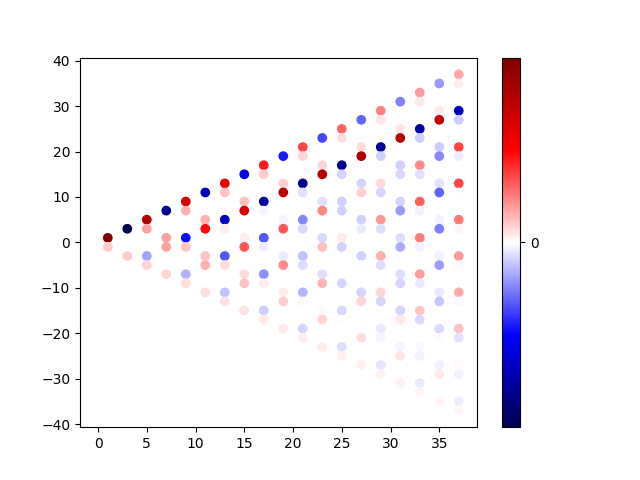

In [23]:
%matplotlib widget

fig, ax = plt.subplots()


cax = ax.scatter(x,y,c=v,cmap=cm.seismic)
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])


#cbar.ax.set_yticklabels([' -1', '0', ' 1'])# vertically oriented colorbar

#norm = mpl.colors.Normalize(vmin=-2, vmax=2)
#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet),cax=ax, orientation='horizontal', label='Some Units')

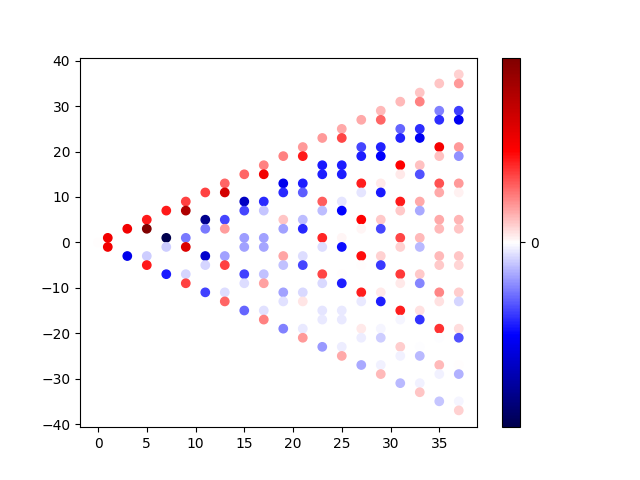

In [24]:
%matplotlib widget

fig1, ax1 = plt.subplots()


cax = ax1.scatter(x,y,c=i,cmap=cm.seismic)
cbar = fig1.colorbar(cax, ticks=[-1, 0, 1])


#cbar.ax.set_yticklabels([' -1', '0', ' 1'])# vertically oriented colorbar

#norm = mpl.colors.Normalize(vmin=-2, vmax=2)
#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet),cax=ax, orientation='horizontal', label='Some Units')